# Student Loan Risk with Deep Learning

In [21]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [22]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [23]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [24]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [25]:
# Define the target set y using the credit_ranking column

y = loans_df["credit_ranking"]

# Display a sample of y
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: credit_ranking, Length: 1599, dtype: int64


In [26]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns="credit_ranking")

# Review the features DataFrame
print(X)

      payment_history  location_parameter  stem_degree_score  gpa_ranking  \
0                 7.4               0.700               0.00          1.9   
1                 7.8               0.880               0.00          2.6   
2                 7.8               0.760               0.04          2.3   
3                11.2               0.280               0.56          1.9   
4                 7.4               0.700               0.00          1.9   
...               ...                 ...                ...          ...   
1594              6.2               0.600               0.08          2.0   
1595              5.9               0.550               0.10          2.2   
1596              6.3               0.510               0.13          2.3   
1597              5.9               0.645               0.12          2.0   
1598              6.0               0.310               0.47          3.6   

      alumni_success  study_major_code  time_to_completion  \
0            

### Step 3: Split the features and target sets into training and testing datasets.


In [27]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [28]:
# Create a StandardScaler instance
X_scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [29]:
nn_model = tf.keras.models.Sequential()

In [30]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=input_nodes))


In [31]:
# Create the Sequential model instance

# Add the  hidden layers
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Display the Sequential model summary
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [33]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Fit the model using 50 epochs and the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 0s 1ms/step - loss: 0.7929 - accuracy: 0.5446
Epoch 2/50
38/38 [==============================] - 0s 1ms/step - loss: 0.7295 - accuracy: 0.5805
Epoch 3/50
38/38 [==============================] - 0s 942us/step - loss: 0.6886 - accuracy: 0.6122
Epoch 4/50
38/38 [==============================] - 0s 942us/step - loss: 0.6621 - accuracy: 0.6364
Epoch 5/50
38/38 [==============================] - 0s 927us/step - loss: 0.6423 - accuracy: 0.6589
Epoch 6/50
38/38 [==============================] - 0s 956us/step - loss: 0.6265 - accuracy: 0.6806
Epoch 7/50
38/38 [==============================] - 0s 933us/step - loss: 0.6143 - accuracy: 0.6889
Epoch 8/50
38/38 [==============================] - 0s 932us/step - loss: 0.6042 - accuracy: 0.6947
Epoch 9/50
38/38 [==============================] - 0s 944us/step - loss: 0.5951 - accuracy: 0.7031
Epoch 10/50
38/38 [==============================] - 0s 917us/step - loss: 0.5876 - accuracy: 0.7164
Epo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


13/13 - 0s - loss: 0.5322 - accuracy: 0.7375 - 82ms/epoch - 6ms/step
Loss: 0.5322398543357849, Accuracy: 0.737500011920929


<Axes: >

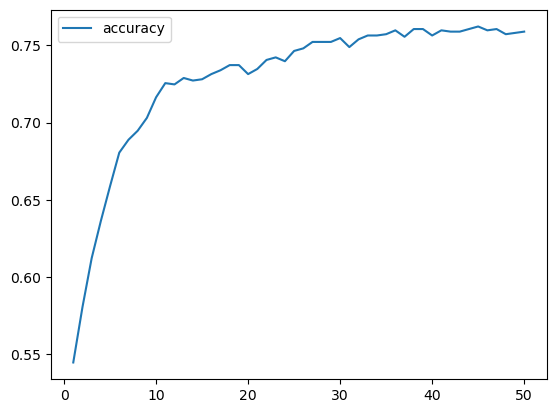

In [35]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Display the model loss and accuracy results
history_df.plot(y="accuracy")

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [36]:
# Set the model's file path
filepath = './Resources/model/student_loans.keras'

# Export your model to a keras file
nn_model.save(filepath)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [37]:
# Set the model's file path
filepath = './Resources/model/student_loans.keras'

# Load the model to a new object
loaded_model = tf.keras.models.load_model(filepath)

# Show the model architecture
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [38]:
# Make predictions with the test data
predictions = nn_model.predict(X_test,verbose=2)


# Display a sample of the predictions
predictions

13/13 - 0s - 49ms/epoch - 4ms/step


array([[0.30433905],
       [0.30433905],
       [0.9891393 ],
       [0.31235492],
       [0.9400555 ],
       [0.8943778 ],
       [0.31235492],
       [0.30433905],
       [0.9992931 ],
       [0.9714311 ],
       [0.31235492],
       [0.30433905],
       [0.30433905],
       [0.30433905],
       [0.30433905],
       [0.30433905],
       [0.31235492],
       [0.30433905],
       [0.30433905],
       [0.30433905],
       [0.98331016],
       [0.31235492],
       [0.30433905],
       [0.9999965 ],
       [0.30433905],
       [0.30433905],
       [0.99785215],
       [0.30433905],
       [0.31235492],
       [0.30433905],
       [0.30433905],
       [0.99998385],
       [0.30433905],
       [0.97955287],
       [0.30433905],
       [0.31235492],
       [0.30433905],
       [0.8425802 ],
       [0.99909776],
       [0.31235492],
       [0.31235492],
       [0.30433905],
       [0.31235492],
       [0.31235492],
       [0.30433905],
       [0.30433905],
       [0.30433905],
       [0.992

In [39]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_rounded = [round(prediction[0],0) for prediction in predictions]
predictions_rounded_df = pd.DataFrame(predictions_rounded)
predictions_rounded_df

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
395,1.0
396,1.0
397,0.0
398,0.0


### Step 4: Display a classification report with the y test data and predictions

In [40]:
# Print the classification report with the y test data and predictions

print(classification_report(y_test, predictions_rounded))

              precision    recall  f1-score   support

           0       0.51      0.83      0.63       188
           1       0.65      0.28      0.39       212

    accuracy                           0.54       400
   macro avg       0.58      0.56      0.51       400
weighted avg       0.58      0.54      0.50       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

 ### 1. To build a recommendation system for student loan options, you would need to collect a variety of data that can be categorized into user data, loan product data, and contextual data. 

Here’s a breakdown of each category and why the data is relevant:

### User Data:
Demographics: 
Information such as age, location, and education level can help tailor loan options to the user’s life stage and local regulations.
#### Financial Information: 
Income, credit score, and existing debt influence what loan terms a student might qualify for.
#### Educational Information: 
The field of study, type of degree, and institution can affect loan eligibility and repayment options, as some fields may have higher earning potential.
#### Repayment Preferences:
Desired repayment period, willingness for variable interest rates, and preferred monthly payment amounts are crucial for personalizing recommendations.

### Loan Product Data:
#### Loan Terms: 
Interest rates, fees, repayment periods, and eligibility requirements are necessary to match products with user needs.
### Lender Reputation: 
Ratings and reviews of lenders can help recommend trustworthy and user-friendly options.
#### Special Features: 
Information on deferment options, income-based repayments, or forgiveness programs can be important for users who anticipate needing flexibility.
### Contextual Data:
#### Economic Indicators: 
Current interest rates, economic forecasts, and job market data can help predict the affordability and advisability of different loan options.
#### Legislation: 
Changes in student loan laws or tax codes can affect the desirability of certain loans.

Collecting this data is relevant because it allows the recommendation system to provide personalized, realistic, and up-to-date loan options that align with the user’s financial situation, educational background, and preferences. It’s important to ensure that data collection complies with privacy laws and regulations, such as GDPR or CCPA, and that users consent to the collection and use of their personal information

### 2. Given the data selected for the student loan recommendation system, the model would primarily use content-based filtering and context-based filtering. Here’s why these methods are suitable:

### Content-Based Filtering:
This method recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms.
In the case of student loans, the “content” includes loan terms, lender reputation, and special features. The user profile would consist of the user’s financial information, educational information, and repayment preferences.
The system would analyze the user’s profile and match it with loan options that have similar characteristics. For example, if a user has a high credit score and is pursuing a degree with high earning potential, the system would recommend loans with favorable terms that are aligned with such profiles.
### Context-Based Filtering:
Context-based filtering takes into account the situational information when providing recommendations. This can include current economic indicators, legislation changes, or even the user’s current stage in their education.
The selected data such as economic indicators and legislation are relevant because they provide the context in which the loan will be utilized. For instance, if the job market is strong, the system might recommend loans with shorter repayment periods, anticipating a higher ability to repay.

While collaborative filtering could also be used, it requires data on the preferences or behaviors of a group of users to make recommendations, which is not the primary focus of the data collected for this system. The chosen data is more about the individual’s circumstances and the specifics of the loan products, making content-based and context-based filtering more appropriate for providing personalized and situationally relevant recommendations.

### 3. Building a recommendation system for student loans involves several real-world challenges. 

Here are two significant ones to consider:

### Data Privacy and Security:
### Challenge:
Handling sensitive personal and financial data requires strict adherence to data protection laws like GDPR and CCPA. Ensuring the security of this data against breaches is paramount.
### Concern: 
Students must trust the system with their personal information. A breach could lead to identity theft, financial fraud, and loss of credibility for the service. Therefore, implementing robust encryption and security protocols is critical.

###  Regulatory Compliance and Changing Policies:
### Challenge: 
Student loan regulations can vary by region and change over time. The system must stay updated with these changes to provide accurate recommendations.
### Concern: 
Recommending loan options that are no longer compliant can lead to legal issues for both the provider and the user. It’s crucial for the system to have a mechanism to regularly update its database and algorithms in accordance with current laws and policies.

These challenges are of concern because they directly affect the system’s reliability, trustworthiness, and legal standing. Addressing them is essential for the successful operation and user acceptance of a student loan recommendation system.